In [1]:
pip install pysr


  Using cached pysr-0.19.4-py3-none-any.whl.metadata (53 kB)
  Using cached juliacall-0.9.23-py3-none-any.whl.metadata (4.6 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached juliapkg-0.1.14-py3-none-any.whl.metadata (6.1 kB)
  Using cached semver-3.0.2-py3-none-any.whl.metadata (5.0 kB)
Using cached pysr-0.19.4-py3-none-any.whl (80 kB)
Using cached juliacall-0.9.23-py3-none-any.whl (12 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
    --------------------------------------- 0.1/6.2 MB 2.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/6.2 MB 4.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.7/6.2 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 0.9/6.2 MB 5.4 MB/s eta 0:00:01
   ---------- ----------------------------- 1.6/6.2 MB 7.4 MB/s eta 0:00:01
   ------------- -------------------------- 2.1/6.2 MB 7.9 MB/s eta 0:00:01
 

In [4]:
import numpy as np
from pysr import pysr, best 

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [5]:
#Datasets

X = 2 * np.random.randn(1000, 3)
y1 = 3 * np.cos(X[:, 2]) * X[:, 1] ** 3 - 1

In [7]:
X

array([[-1.07683946,  0.62703193,  1.57631046],
       [-3.0089544 , -3.49118957,  1.15291153],
       [ 3.48826253,  1.66116331,  1.21253572],
       ...,
       [-4.54892279,  3.13579416, -1.41447457],
       [-3.10543776,  0.83264333,  6.1505845 ],
       [-1.71864649, -0.06536772,  0.49081556]])

In [10]:
y1

array([ 1.37064109e+02, -2.81054729e+00, -1.00395101e+00,  2.32778970e+00,
       -1.16975679e+00,  3.40843435e+01,  4.16046905e+00, -7.56014756e+01,
        2.03490328e+02,  4.12219492e-01,  2.95671449e+00, -1.27245158e+00,
       -9.25235306e-01, -1.57692566e+00, -1.31889531e+01,  8.75629355e+01,
       -3.87222338e-01,  4.70666981e+01, -2.21940451e+02,  2.26160992e+01,
        7.80497149e-01, -3.91418932e-02,  1.62528062e+01, -3.19968154e+00,
        1.23087080e+02, -1.80404738e+00,  4.24983449e+00, -6.05574380e+01,
        6.39562055e+00, -6.54968230e-01, -5.45212482e+00,  2.79162019e+01,
        1.40166760e+02, -1.49651863e+02, -3.70956884e+00, -1.00013157e+00,
       -1.24711849e+01,  1.45795673e+00,  2.07777245e+01,  5.16100235e+01,
       -2.64828544e+01, -2.54278091e+01, -1.67092304e+00,  2.83451334e+00,
        1.29269932e+00, -9.74586010e+00, -6.42126813e+00, -4.42153608e+00,
       -1.07677438e+02, -1.13994301e+01, -4.45894498e+00,  1.47556482e+00,
        3.84752334e+00, -

In [ ]:
model.set_params(extra_sympy_mappings={'inv': lambda x: 1/x}), 
where 
lambda x: 1/x

In [9]:
#Learn Equation

equations = pysr(
    X,
    y1,
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",  # predefined library operators
        #"inv(X) = 1/X", # define your operators, Julia syntax
    ],
)

c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\deprecated.py:30: FutureWarning: Calling `pysr` is deprecated. Please use `model = PySRRegressor(**params); model.fit(X, y)` going forward.
  warnings.warn(
c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!


Running the procedure as a model

In [10]:
from pysr import PySRRegressor
import numpy as np

# Define your data (example X and y)
X = np.random.rand(100, 2)  # Example feature data
y1 = np.random.rand(100)  # Example target data

# Initialize the symbolic regression model
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",  # predefined library operators
        "inv(X) = 1/X",  # define your custom operator in Julia syntax
    ],
    extra_sympy_mappings={"inv": lambda x: 1/x},  # Define custom operator in SymPy
)

# Fit the model to data
model.fit(X, y1)


c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                    sin(0.47104168)   
	1        0.008576                    (-0.15230706 * x0) + 0.53553456   
	2        0.003418                     sin(exp(sin(x0 + -2.7078695)))   
	3        0.001855          (sin(inv(x0)) * -0.15230706) + 0.53553456   
	4        0.009125           sin(exp(sin(sin(inv(x0 + -1.4309057)))))   
	5        0.008635      sin(exp(sin(cos(-3.5477908 + sin(inv(x0))))))   
	6  >>>>  0.013184  1.1370611 * inv(exp(sin(cos(sin(exp(exp(x1))))...   
	7        0.000138  ((1.0753624 + 0.025684036) * 1.0465528) * inv(...   
	
	       loss  complexity  
	0  0.073766           2  
	1  0.071892           5  
	2  0.071647           6  
	3  0.071514           7  
	4  0.070865           8  
	5  0.070255           9  
	6  0.067531          12  
	7  0.067494          16  
]

In [18]:
#Datasets

X1 = 2 * np.random.randn(1000, 4)
y1 = 2 * np.cos(X[:, 1]) * X[:, 1] ** 5 - 1

In [17]:

# Initialize the symbolic regression model
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",  # predefined library operators
        "inv(X) = 1/X",  # define your custom operator in Julia syntax
    ],
    extra_sympy_mappings={"inv": lambda x: 1/x},  # Define custom operator in SymPy
)

# Fit the model to data
model.fit(X1, y1)

c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1000, 100]

In [19]:
print(f"X1 shape: {X1.shape}")
print(f"y1 shape: {y1.shape}")


X1 shape: (1000, 4)
y1 shape: (100,)


In [20]:
# Check and match lengths
if X1.shape[0] != len(y1):
    print(f"Inconsistent lengths: X1 has {X1.shape[0]} samples, y1 has {len(y1)} samples.")
    # Truncate X1 to match y1 length
    X1 = X1[:len(y1)]

# After ensuring the lengths are consistent, fit the model
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=["cos", "exp", "sin"],
    extra_sympy_mappings={"inv": lambda x: 1/x}  # Define custom operator in SymPy
)

# Fit the model
model.fit(X1, y1)

Inconsistent lengths: X1 has 1000 samples, y1 has 100 samples.


c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                   sin(-0.89879745)   
	1        0.004116           cos(cos(-0.100175224 * x1)) + -1.3531282   
	2        0.002146           sin(cos(exp(cos(sin(0.08405628) * x1))))   
	3        0.004347  sin(cos(exp(cos((-1.104515 * x1) * 0.08405628))))   
	4  >>>>  0.060398  sin(sin(sin(exp(sin(0.6383955) * x2)) + -1.849...   
	5        0.020139  sin(sin((sin(exp(0.60146517 * x2)) * 0.8804185...   
	6        0.020679  sin(sin(sin(exp(sin(x3) + (x0 * 0.44660622)) *...   
	
	       loss  complexity  
	0  0.084235           2  
	1  0.082519           7  
	2  0.082342           8  
	3  0.081985           9  
	4  0.077180          10  
	5  0.075641          11  
	6  0.071091          14  
]

INCREASE THE AMOUNT OF POSSIBLE OPERATORS TO TRY

In [49]:
# Check and match lengths
if X1.shape[0] != len(y1):
    print(f"Inconsistent lengths: X1 has {X1.shape[0]} samples, y1 has {len(y1)} samples.")
    # Truncate X1 to match y1 length
    X1 = X1[:len(y1)]

# After ensuring the lengths are consistent, fit the model
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=["cos", "exp", "sin"],
    extra_sympy_mappings={"inv": lambda x: 1/x}  # Define custom operator in SymPy
)

# Fit the model
model.fit(X1, y1)

c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                    sin(-0.8986875)   
	1        0.004699            sin(sin((0.08481119 * x2) + -1.092582))   
	2        0.019799     sin(sin((sin(-0.081179745) * x3) - 1.1645108))   
	3        0.001262  (-0.33754328 / 0.43138176) + (exp(x1 - -1.2058...   
	4  >>>>  0.053253  sin(sin(-1.1164784 - sin(2.312907 * (0.0976314...   
	5        0.002117  sin((-0.18960968 - exp(-0.39086)) - (-0.018221...   
	6        0.001959  sin((-0.18960968 - exp(sin(-0.39086))) - (-0.0...   
	7        0.002141  sin((-0.18960968 - exp(-0.39086)) - (-0.018221...   
	8        0.011267  sin(sin((-0.18960968 - cos(0.20512864)) - (-0....   
	9        0.017051  sin(sin((-0.18960968 - cos(0.44704962)) - sin(...   
	
	       loss  complexity  
	0  0.084235           2  
	1  0.082279           7  
	2  0.080666           8  
	3  0.080462          10  
	4  0.076289          11  
	5  0.075646          15  
	6  0.075498          16  
	7  0.075336          17  
	8  0.074492          18  
	9  0.073233          19  
]

In [54]:
# Check and match lengths
if X1.shape[0] != len(y1):
    print(f"Inconsistent lengths: X1 has {X1.shape[0]} samples, y1 has {len(y1)} samples.")
    # Truncate X1 to match y1 length
    X1 = X1[:len(y1)]

# After ensuring the lengths are consistent, fit the model
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=["cos", "exp", "sin"],
    extra_sympy_mappings={"inv": lambda x: 1/x}  # Define custom operator in SymPy
)

# Fit the model
model.fit(X1, y1)

c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                   sin(-0.89879745)   
	1        0.007092                 0.18684794 - cos(-0.12388619 * x1)   
	2        0.004104             sin(0.0477323 - cos(x1 * -0.15147923))   
	3        0.003252            sin(-1.705573 + cos(cos(exp(x0 - x3))))   
	4        0.024125       sin(sin(-1.705573 + cos(cos(exp(x0 - x3)))))   
	5        0.050154  0.20162281 - cos(sin(sin(-0.08126309 * (0.4993...   
	6        0.002833  (-0.62013865 * (0.22256975 * (((cos(x0 + x3) *...   
	7  >>>>  0.061863  (-0.62013865 * ((((cos(x0 + x3) * -0.62013865)...   
	8        0.000288  (-0.62013865 * sin((((cos(x0 + x3) * -0.620138...   
	
	       loss  complexity  
	0  0.084235           2  
	1  0.081879           6  
	2  0.081543           7  
	3  0.081015           9  
	4  0.079084          10  
	5  0.075215          11  
	6  0.074157          16  
	7  0.069709          17  
	8  0.069688          18  
]

In [55]:
# Display the discovered equations

model.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,2,0.084235,0.000000,sin(-0.89879745),sin(-0.89879745),PySRFunction(X=>sin(-0.89879745))
1,6,0.081879,0.007092,0.18684794 - cos(-0.12388619 * x1),0.18684794 - cos(-0.12388619*x1),PySRFunction(X=>0.18684794 - cos(-0.12388619*x1))
2,7,0.081543,0.004104,sin(0.0477323 - cos(x1 * -0.15147923)),sin(0.0477323 - cos(x1*(-0.15147923))),PySRFunction(X=>sin(0.0477323 - cos(x1*(-0.151...
3,9,0.081015,0.003252,sin(-1.705573 + cos(cos(exp(x0 - x3)))),sin(cos(cos(exp(x0 - x3))) - 1.705573),PySRFunction(X=>sin(cos(cos(exp(x0 - x3))) - 1...
4,10,0.079084,0.024125,sin(sin(-1.705573 + cos(cos(exp(x0 - x3))))),sin(sin(cos(cos(exp(x0 - x3))) - 1.705573)),PySRFunction(X=>sin(sin(cos(cos(exp(x0 - x3)))...
5,11,0.075215,0.050154,0.20162281 - cos(sin(sin(-0.08126309 * (0.4993...,0.20162281 - cos(sin(sin(-0.08126309*(0.499324...,PySRFunction(X=>0.20162281 - cos(sin(sin(-0.08...
6,16,0.074157,0.002833,(-0.62013865 * (0.22256975 * (((cos(x0 + x3) *...,-0.62013865*0.22256975*(cos(x0 + x3)*(-0.62013...,PySRFunction(X=>-0.62013865*0.22256975*(cos(x0...
7,17,0.069709,0.061863,(-0.62013865 * ((((cos(x0 + x3) * -0.62013865)...,-0.62013865*(cos(x0 + x3)*(-0.62013865) - 1*0....,PySRFunction(X=>-0.62013865*(cos(x0 + x3)*(-0....
8,18,0.069688,0.000288,(-0.62013865 * sin((((cos(x0 + x3) * -0.620138...,-0.62013865*sin((cos(x0 + x3)*(-0.62013865) - ...,PySRFunction(X=>-0.62013865*sin((cos(x0 + x3)*...


In [56]:
# Get the best equation (with the lowest loss)
best_equation = model.get_best()
print("Best equation:", best_equation)


Best equation: complexity                                                      17
loss                                                      0.069709
score                                                     0.061863
equation         (-0.62013865 * ((((cos(x0 + x3) * -0.62013865)...
sympy_format     -0.62013865*(cos(x0 + x3)*(-0.62013865) - 1*0....
lambda_format    PySRFunction(X=>-0.62013865*(cos(x0 + x3)*(-0....
Name: 7, dtype: object


In [57]:
# Make predictions on new data X_new
y_pred1 = model.predict(X1)


In [48]:
y_pred1

array([-0.77220199, -0.84894866, -0.76427357, -0.83112962, -0.76754286,
       -0.74751866, -0.77373437, -0.63136906, -0.76527434, -0.87025672,
       -0.7597811 , -0.74748026, -0.90073471, -0.7464434 , -0.74701929,
       -0.6983162 , -0.75594869, -0.76108169, -0.74680738, -0.82011551,
       -0.75033344, -0.8582596 , -0.66844001, -0.8663112 , -0.77399174,
       -0.75585311, -0.77091327, -0.76600247, -0.79896577, -0.81112678,
       -0.79072357, -0.81352281, -0.75315521, -0.79025907, -0.78136262,
       -0.8046283 , -0.74213025, -0.76153815, -0.77477321, -0.7877557 ,
       -0.74719395, -0.89082068, -0.8119692 , -0.75497955, -0.88875713,
       -0.72352052, -0.78378996, -0.75314349, -0.77304446, -0.61266581,
       -0.77548591, -0.6696251 , -0.81206695, -0.8308194 , -0.71911871,
       -0.83875657, -0.74854202, -0.80389542, -0.81890471, -0.78014872,
       -0.78634476, -0.79224453, -0.74269816, -0.64956094, -0.72774579,
       -0.78993968, -0.7313974 , -0.78593094, -0.902061  , -0.80

In [60]:
# Compare predictions with actual values
print("Ground Truth Y values:", y1)

# Calculate evaluation metrics
mae = mean_absolute_error(y1, y_pred1)
mse = mean_squared_error(y1, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_pred1)

# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Ground Truth Y values: [-0.99985162 -1.         -0.64879804 -0.68483367 -0.98151934 -0.99903906
 -0.99999851 -0.96756966 -0.47917019 -0.79624418 -0.88301398 -0.57022
 -0.99195458 -0.39648436 -0.22367754 -0.95278158 -0.99967637 -0.99999059
 -0.00558064 -0.32648484 -0.99997411 -0.99999766 -0.68561231 -0.99999999
 -0.94925334 -0.15248114 -0.904152   -0.84842999 -0.99624642 -1.
 -0.99983346 -0.63973409 -1.         -0.80131754 -0.99945309 -0.32583347
 -0.99994685 -0.91471669 -0.94420605 -0.93960499 -0.50270705 -0.87499855
 -0.98829899 -1.         -0.93528184 -0.92966854 -0.13334101 -0.99932715
 -0.91703177 -0.51910174 -0.99817721 -0.43321113 -0.98586854 -0.75405321
 -1.         -0.20344834 -0.27100606 -0.90861572 -0.9993751  -0.89487625
 -0.99712696 -0.99915782 -0.99872565 -0.58601401 -0.99995116 -0.99936006
 -0.9791784  -0.83897411 -0.99579284 -0.4775764  -0.99999999 -0.50730439
 -0.92427037 -0.97706208 -0.89031017 -0.98129179 -0.96749867 -0.14550679
 -0.64522896 -0.99752088 -0.59417443 -0

Mean Absolute Error (MAE): 0.21458045333381576
Mean Squared Error (MSE): 0.06970858919743889
Root Mean Squared Error (RMSE): 0.2640238421003658
R-squared (R²): 0.17244832034933144


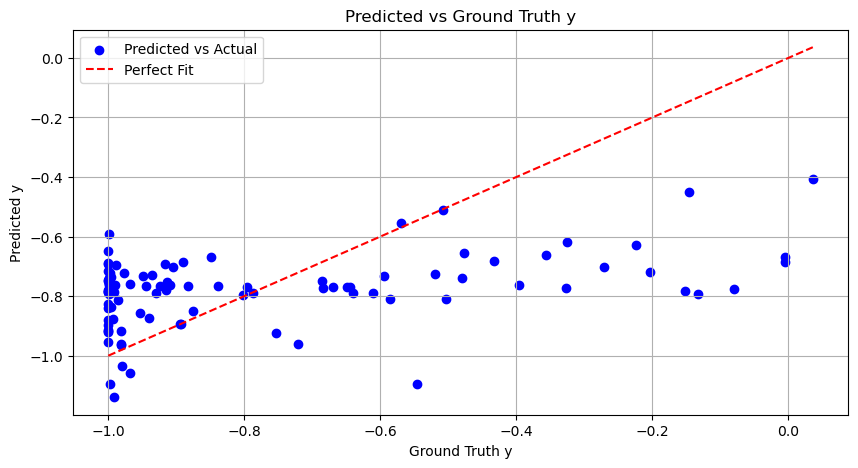

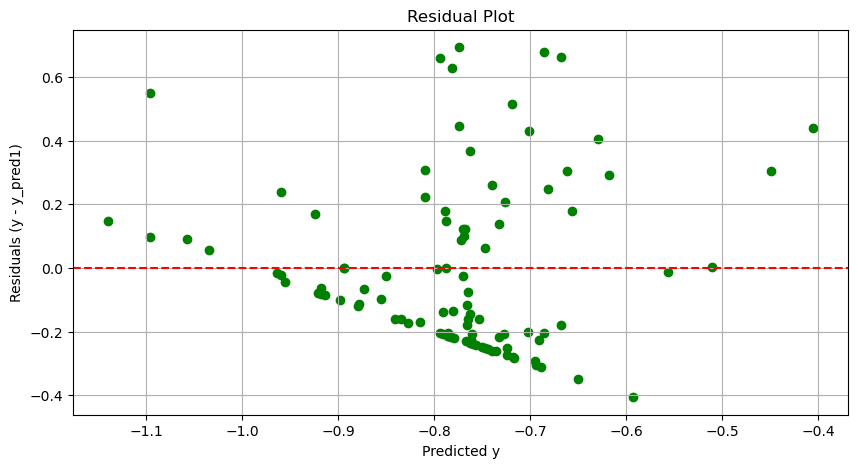

In [61]:
# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# 1. Scatter Plot: Ground Truth vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y1, y_pred1, color='blue', label='Predicted vs Actual')
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Ground Truth y')
plt.ylabel('Predicted y')
plt.title('Predicted vs Ground Truth y')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot: Residuals (y1 - y_pred1)
residuals = y1 - y_pred1

plt.figure(figsize=(10, 5))
plt.scatter(y_pred1, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted y')
plt.ylabel('Residuals (y - y_pred1)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

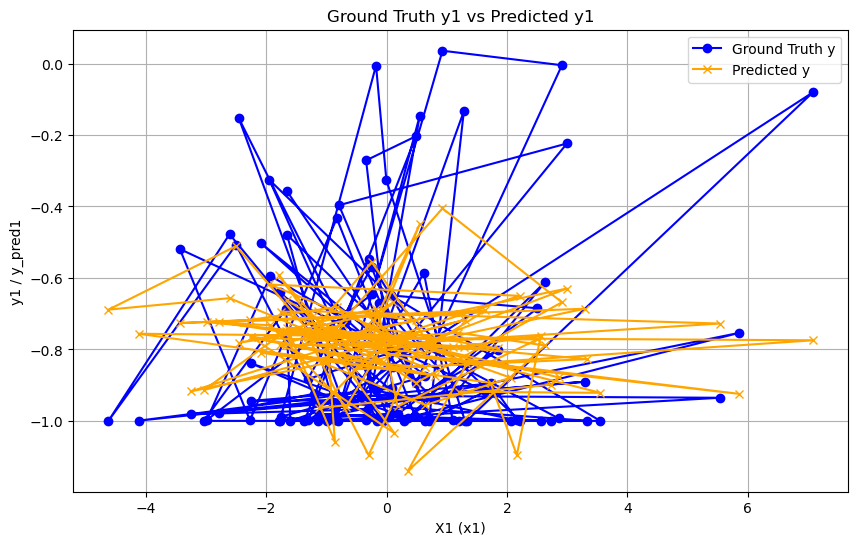

In [62]:
# Extract x1 from X for plotting
x1 = X1[:, 0]

# 1. Plot Ground Truth and Predicted Values against X (x1)
plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x1, y_pred1, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X1 (x1)')
plt.ylabel('y1 / y_pred1')
plt.title('Ground Truth y1 vs Predicted y1')
plt.legend()
plt.grid(True)
plt.show()

The result of the first is saved as a csv file, but the second procedure yielded a better result based on score due to the initiation a custom operator

In [22]:
import pandas as pd
import math

In [23]:
# Define the equation
def discovered_equation(X):
    x1 = X[:, 0]  # First column of X (x1)
    x2 = X[:, 1]  # Second column of X (x2)
    
    # Apply the discovered equation
    term1 = np.cos(x2) * (x1 + (x1 * (-0.99996215 + (x1 * (x1 + (x1 + x1))))))
    term2 = np.sin(np.exp(1.54871))
    
    # Final prediction
    y_pred = term1 + term2
    return y_pred

# Make predictions using the equation
y_pred = discovered_equation(X)

# Print predicted values
print("Predicted Y values:", y_pred)

Predicted Y values: [-0.993867   -0.40939026  0.05389016 -0.95104933 -0.89257485 -0.99742256
  1.22824833 -0.9660185  -0.81160674  0.23241565 -0.68311815 -0.17485266
 -0.61693795  0.46279413 -0.99713887 -0.32670251  1.7662517  -0.81261049
 -0.14661566 -0.83868111 -0.9966215   0.42965053  0.08665569 -0.89826365
 -0.43148522  0.68071307  0.91204512 -0.11807054 -0.9998883  -0.99048974
  0.68014492 -0.99981396  1.97527257 -0.99997554  1.83796861 -0.99948933
 -0.87964545  0.16756907 -0.1156254   0.00477669 -0.96653468 -0.47779892
 -0.04108885 -0.68605055 -0.35031887  0.8260335  -0.92587031 -0.96555194
 -0.01184109 -0.40506919 -0.71137589 -0.37065135 -0.22641886  0.0957022
 -0.77210225 -0.71495691 -0.99896923 -0.31694704 -0.89532358 -0.70750155
 -0.63357396  1.4913287  -0.9970755  -0.31244071 -0.69298469 -0.52484832
  1.60758006 -0.98847794  1.17499413 -0.92930611 -0.99927168 -0.22139434
 -0.85962981 -0.57272595  0.40199395 -0.96942841 -0.30668591 -0.25244817
  1.07275571 -0.50598116 -0.9919

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
# Compare predictions with actual values
print("Ground Truth Y values:", y1)

# Calculate evaluation metrics
mae = mean_absolute_error(y1, y_pred)
mse = mean_squared_error(y1, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_pred)

# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Ground Truth Y values: [7.57214447e-02 2.07245910e-01 1.56303723e-01 7.87687914e-01
 5.67013917e-01 2.20074862e-01 2.60111223e-01 9.29805060e-01
 2.40445711e-01 4.70793928e-01 5.82355378e-01 3.45025185e-01
 4.67014758e-01 5.95964918e-01 7.10882119e-01 3.66498882e-01
 8.95882170e-01 4.39394719e-02 1.22611519e-02 4.56031549e-01
 2.73113524e-01 3.42954817e-01 9.47265884e-01 7.88849776e-02
 2.06561509e-01 3.84540411e-01 2.40352017e-01 8.22131244e-01
 7.89651259e-01 4.56417510e-01 5.20736848e-01 7.58982783e-01
 1.35167389e-01 3.59846570e-01 9.77458732e-01 7.64062785e-01
 1.98319495e-01 8.40432985e-01 3.82583549e-01 2.64946382e-01
 4.90313043e-01 5.38979276e-01 6.39655748e-04 1.97240725e-01
 2.72736899e-01 4.69965489e-01 1.90838539e-01 2.60165298e-01
 2.83568379e-02 7.25852430e-01 2.76855383e-01 5.15932046e-02
 6.53597443e-01 2.91226373e-02 2.67998562e-01 3.98100859e-02
 5.08237515e-01 6.22469933e-01 8.00956130e-01 7.57536828e-01
 2.36129287e-01 1.11345161e-01 4.64134050e-01 3.69367939e-01
 

In [26]:
import matplotlib.pyplot as plt

Mean Absolute Error (MAE): 0.9922524245422611
Mean Squared Error (MSE): 1.2521604060978193
Root Mean Squared Error (RMSE): 1.1189997346281273
R-squared (R²): -15.974813118064677


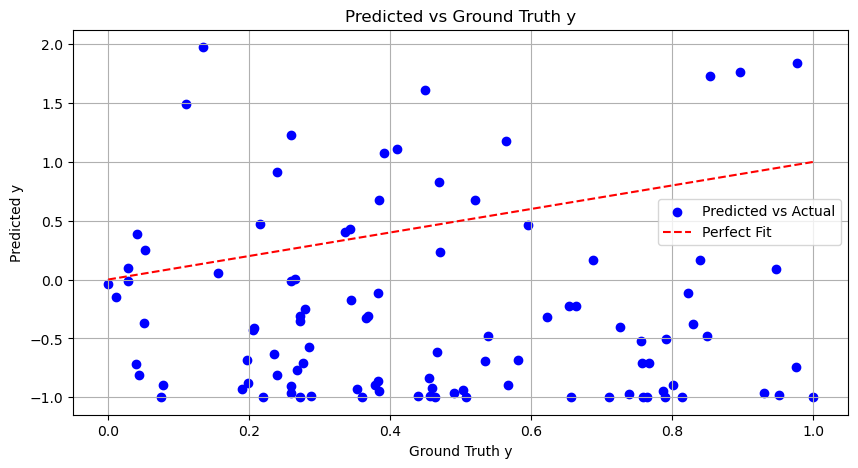

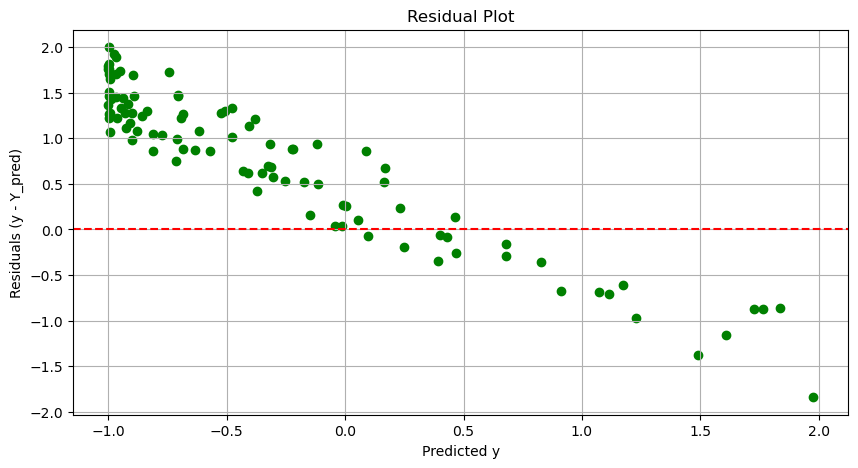

In [27]:
# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# 1. Scatter Plot: Ground Truth vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y1, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Ground Truth y')
plt.ylabel('Predicted y')
plt.title('Predicted vs Ground Truth y')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot: Residuals (y - y_pred)
residuals = y1 - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted y')
plt.ylabel('Residuals (y - Y_pred)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

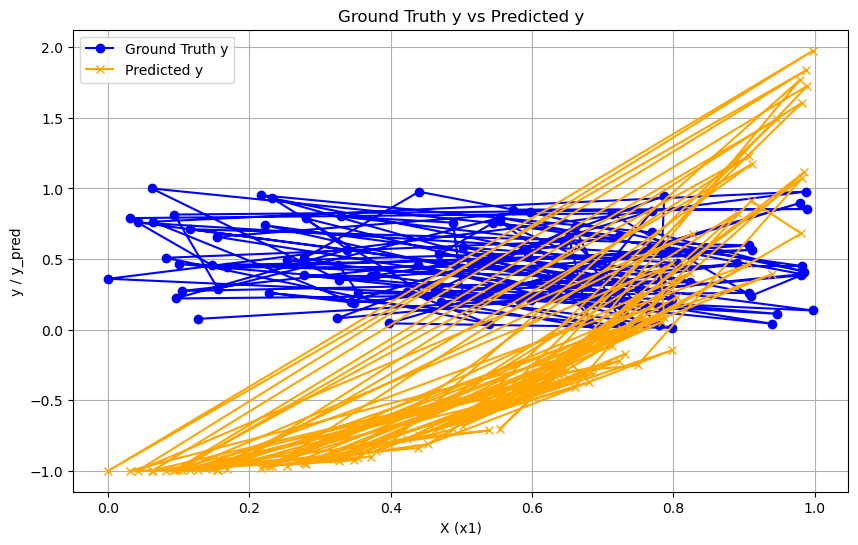

In [28]:

# Extract x1 from X for plotting
x1 = X[:, 0]

# 1. Plot Ground Truth and Predicted Values against X (x1)
plt.figure(figsize=(10, 6))

plt.plot(x1, y, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x1, y_pred, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X (x1)')
plt.ylabel('y / y_pred')
plt.title('Ground Truth y vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()

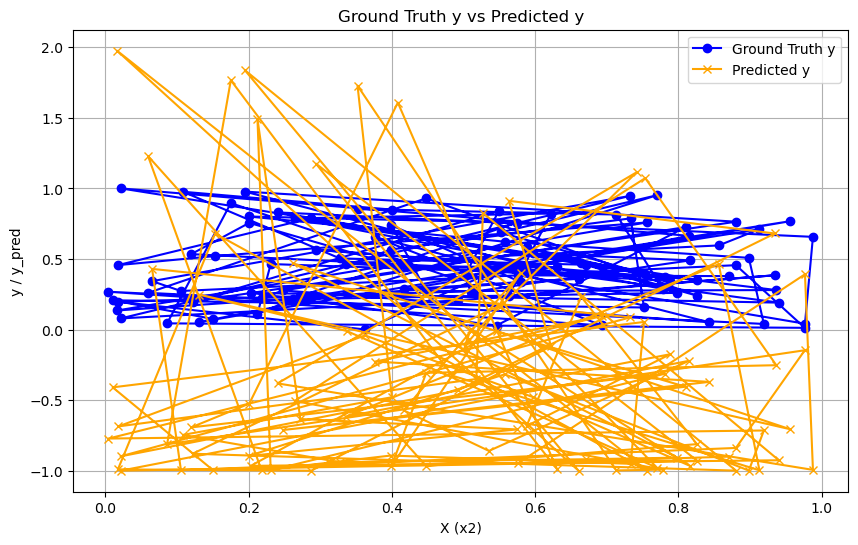

In [29]:
# Extract x2 from X for plotting
x2 = X[:, 1]

# 1. Plot Ground Truth and Predicted Values against X (x2)
plt.figure(figsize=(10, 6))

plt.plot(x2, y1, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x2, y_pred, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X (x2)')
plt.ylabel('y / y_pred')
plt.title('Ground Truth y vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()

TRYING THE FORMULA FROM THE SECOND EQUATION DISCOVERY PROCEDURE

In [31]:
# Define the equation
def discovered_equation(X):
    x0 = X[:, 0]  # First column of X (x0)
    x1 = X[:, 1]  # Second column of X (x1)
    
    # Apply the new discovered equation
    term1 = x1 * np.sin(np.sin(x0 + np.sin(x0)))
    term2 = np.cos(term1 * -1.336084 + -0.25184187)
    term3 = np.sin(np.sin(x1) + 0.53852195)
    
    # Final prediction using the new equation
    y_pred = np.sin(term2 * term3)
    
    return y_pred

# Make predictions using the new equation
y_pred4 = discovered_equation(X)

# Print predicted values
print("Predicted Y values:", y_pred4)


Predicted Y values: [0.56962255 0.48261448 0.41689143 0.6341186  0.62613481 0.60768803
 0.50957517 0.65982176 0.47598024 0.4755807  0.56243998 0.39380428
 0.59341566 0.33312103 0.74366362 0.56705509 0.55650341 0.52592263
 0.21415657 0.45325583 0.54526664 0.51235096 0.43066836 0.48987479
 0.56955554 0.27319377 0.52993154 0.50540626 0.64786185 0.48832997
 0.54879461 0.77584602 0.48615494 0.77366507 0.56215051 0.77696881
 0.54506212 0.53505955 0.55628159 0.55142486 0.63855068 0.53587456
 0.5802292  0.48751608 0.558359   0.54333926 0.50498692 0.58872919
 0.53864578 0.39073424 0.58431504 0.35854197 0.58191591 0.45843153
 0.47907975 0.35374402 0.76720353 0.54276183 0.57938201 0.57096261
 0.58642772 0.56598607 0.61354654 0.40680631 0.54044635 0.5676018
 0.5766292  0.70494593 0.57783932 0.57358636 0.49187264 0.37372157
 0.61452906 0.5901196  0.52056631 0.65324026 0.57461215 0.25929826
 0.42656851 0.58160634 0.71675933 0.74819741 0.58124087 0.58705326
 0.53591492 0.62527392 0.61715141 0.5614393

In [32]:
# Compare predictions with actual values
print("Ground Truth Y values:", y1)

# Calculate evaluation metrics
mae = mean_absolute_error(y1, y_pred4)
mse = mean_squared_error(y1, y_pred4)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_pred4)

# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Ground Truth Y values: [7.57214447e-02 2.07245910e-01 1.56303723e-01 7.87687914e-01
 5.67013917e-01 2.20074862e-01 2.60111223e-01 9.29805060e-01
 2.40445711e-01 4.70793928e-01 5.82355378e-01 3.45025185e-01
 4.67014758e-01 5.95964918e-01 7.10882119e-01 3.66498882e-01
 8.95882170e-01 4.39394719e-02 1.22611519e-02 4.56031549e-01
 2.73113524e-01 3.42954817e-01 9.47265884e-01 7.88849776e-02
 2.06561509e-01 3.84540411e-01 2.40352017e-01 8.22131244e-01
 7.89651259e-01 4.56417510e-01 5.20736848e-01 7.58982783e-01
 1.35167389e-01 3.59846570e-01 9.77458732e-01 7.64062785e-01
 1.98319495e-01 8.40432985e-01 3.82583549e-01 2.64946382e-01
 4.90313043e-01 5.38979276e-01 6.39655748e-04 1.97240725e-01
 2.72736899e-01 4.69965489e-01 1.90838539e-01 2.60165298e-01
 2.83568379e-02 7.25852430e-01 2.76855383e-01 5.15932046e-02
 6.53597443e-01 2.91226373e-02 2.67998562e-01 3.98100859e-02
 5.08237515e-01 6.22469933e-01 8.00956130e-01 7.57536828e-01
 2.36129287e-01 1.11345161e-01 4.64134050e-01 3.69367939e-01
 

Mean Absolute Error (MAE): 0.23340306007721856
Mean Squared Error (MSE): 0.07557278414165404
Root Mean Squared Error (RMSE): 0.27490504568242113
R-squared (R²): -0.024496447395417453


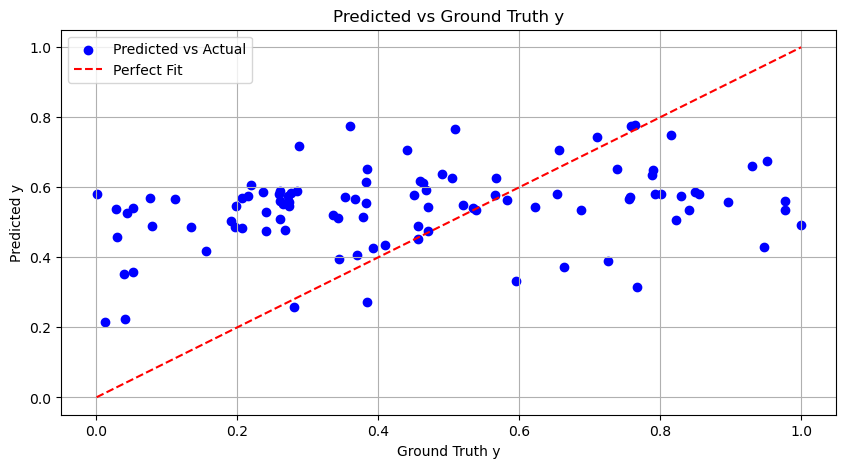

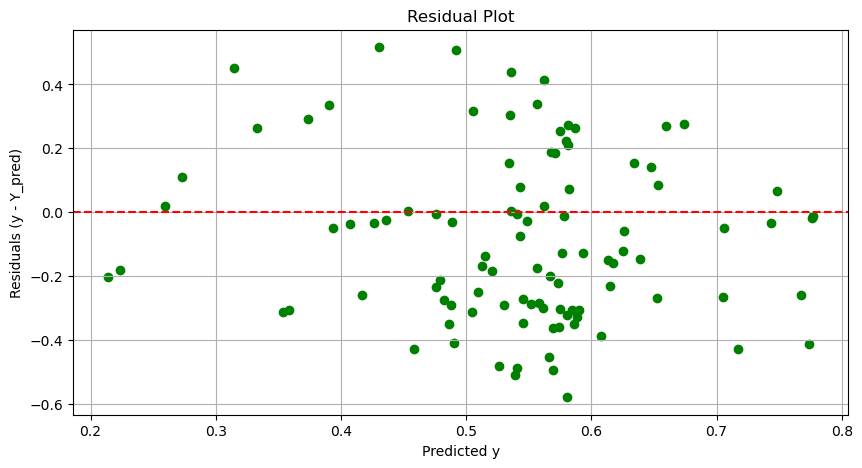

In [33]:
# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# 1. Scatter Plot: Ground Truth vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y1, y_pred4, color='blue', label='Predicted vs Actual')
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Ground Truth y')
plt.ylabel('Predicted y')
plt.title('Predicted vs Ground Truth y')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot: Residuals (y - y_pred4)
residuals = y1 - y_pred4

plt.figure(figsize=(10, 5))
plt.scatter(y_pred4, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted y')
plt.ylabel('Residuals (y - Y_pred)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

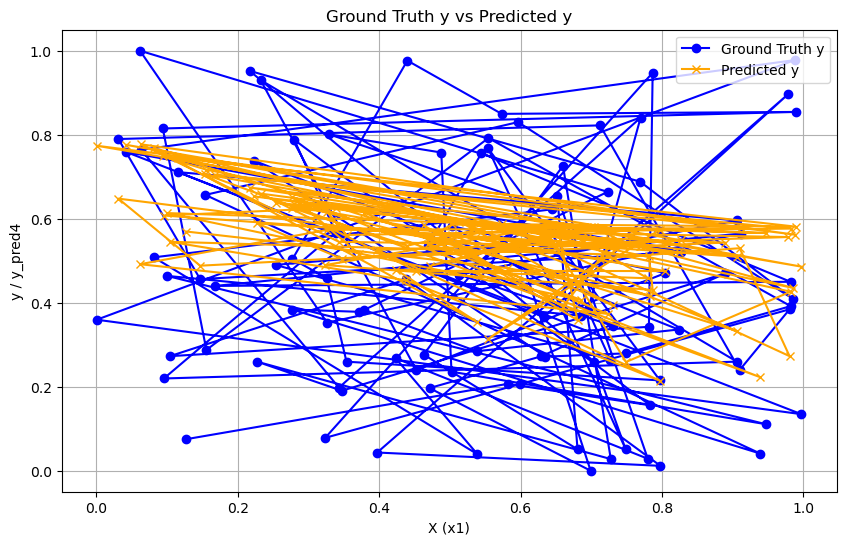

In [34]:
# Extract x1 from X for plotting
x1 = X[:, 0]

# 1. Plot Ground Truth and Predicted Values against X (x1)
plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x1, y_pred4, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X (x1)')
plt.ylabel('y / y_pred4')
plt.title('Ground Truth y vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()

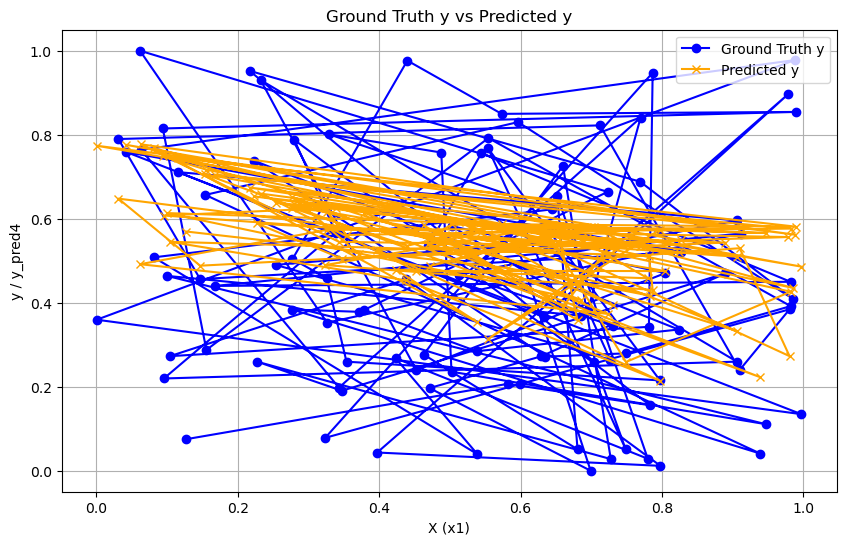

In [35]:
# Extract x1 from X for plotting
x2 = X[:, 1]

# 1. Plot Ground Truth and Predicted Values against X (x1)
plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x1, y_pred4, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X (x1)')
plt.ylabel('y / y_pred4')
plt.title('Ground Truth y vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()

TRYING THE SECOND ORDER TAYLOR SERIES EXPANSION OF THE EQUATION

In [35]:
# Define the discovered equation
def discovered_equation(x1):
    return -0.188 + 0.00003785 * x1 + 1.5 * x1**2

# Make predictions using the discovered equation
y_pred2 = discovered_equation(x1)

# Compare predictions with actual values
mae = mean_absolute_error(y1, y_pred2)
mse = mean_squared_error(y1, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_pred2)

# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 27.040666070038366
Mean Squared Error (MSE): 5051.861524566917
Root Mean Squared Error (RMSE): 71.07644845212032
R-squared (R²): -0.019002603687385156


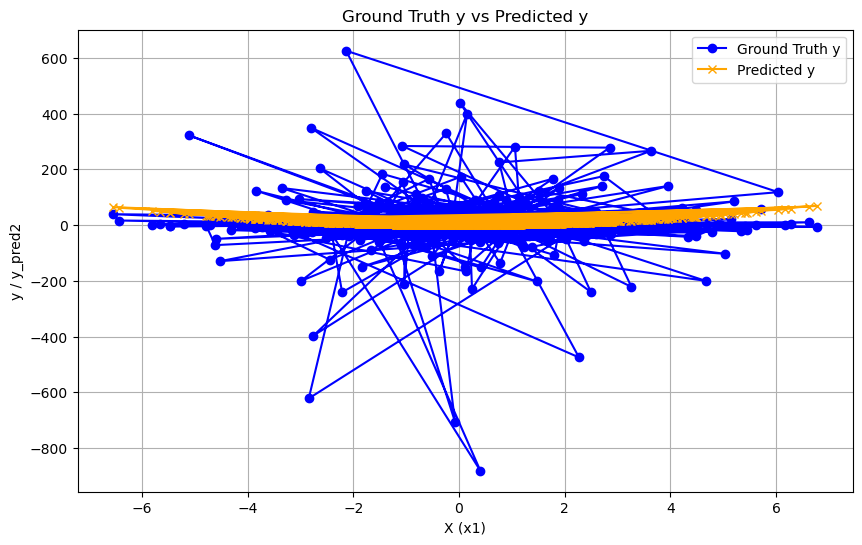

In [36]:
# Plot Ground Truth and Predicted Values against X (x1)
plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x1, y_pred2, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X (x1)')
plt.ylabel('y / y_pred2')
plt.title('Ground Truth y vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()

TRYING WITH REAL LIFE DATASET

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv("Data/Automobile_data.csv")

In [38]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


DATA WRANGLING AND FEATURE ENGINEERING TO MAKE THE DATASET NUMERICAL IN ORDER TO BE ABLE TO PERFORM EQUATION DISCOVERY ON IT

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [40]:
# Extracting the y, Ground Truth / Target variable from the dataset

y_RL = df["price"]

ANOTHER DATASET

In [63]:
df_wine = pd.read_csv("Data/winequality-red.csv")

In [64]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [65]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [66]:
y_wine = df_wine["quality"]

In [69]:
X_wine = df_wine.iloc[:, :-1].values  # Features (all rows, all columns except the last)

In [70]:
X_wine

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

TRYING OUT THE SYMBOLI REGRESSION METHOD OF EQUATION DISCOVERY ON THE DATASET

In [73]:
from pysr import PySRRegressor

# Initialize the PySRRegressor with all available operators
model = PySRRegressor(
    niterations=1000,  # Number of iterations (adjust as necessary)
    
    # List of binary operators (two inputs)
    binary_operators=[
        "+",    # Addition
        "-",    # Subtraction
        "*",    # Multiplication
        "/",    # Division
        "^",    # Power (alternative to **)
        "%",    # Modulo (remainder after division)
        "max",  # Maximum of two values
        "min",  # Minimum of two values
    ],
    
    # List of unary operators (one input)
    unary_operators=[
        "sin",      # Sine function
        "cos",      # Cosine function
        "tan",      # Tangent function
        "exp",      # Exponential function (e^x)
        "log",      # Natural logarithm (ln(x))
        "abs",      # Absolute value
        "sqrt",     # Square root
        "sign",     # Sign function (+1, 0, -1)
        "inv",      # Inverse (1/x)
        "square",   # Square of the value (x**2)
        "cube",     # Cube of the value (x**3)
    ],
    
    # Define any custom operators (optional)
    extra_sympy_mappings={"inv": lambda x: 1/x},  # Example of a custom operator
)

# Fit the model with your dataset
model.fit(X_wine, y_wine)

# View the best equations discovered
equations = model.equations_
print("Discovered Equations:")
print(equations)



c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2059: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. You should run PySR for more `niterations` to ensure it can find the correct variables, and consider using a larger `maxsize`.
  warnings.warn(
c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:73: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Expressions evaluated per second: 9.720e+04
Head worker occupation: 14.4%
Progress: 227 / 15000 total iterations (1.513%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           6.518e-01  7.971e+00  y = abs(5.6364)
3           5.347e-01  1.980e-01  y = square(log(x₁₀))
5           4.957e-01  3.784e-02  y = square(log(x₂ + x₁₀))
6           4.945e-01  2.558e-03  y = square(log(x₁₀ + sqrt(x₂)))
7           4.652e-01  6.107e-02  y = (square(log(x₁₀)) - -0.72169) - x₁
8           4.549e-01  2.221e-02  y = abs((square(log(x₁₀)) - x₁) + x₉)
9           4.529e-01  4.537e-03  y = abs((square(log(x₁₀)) - x₁) + sin(x₉))
10          4.450e-01  1.755e-02  y = abs((square(log(x₁₀)) - x₁) + min(x₉, 0.88133))
12          4.431e-01  2.189e-03  y = max(-0.83146, (abs(sin(tan(x₉))) + square(log(x₁₀))) - x₁)
-------------------------------------------------------------------------------------

TRYING THE *SPARSE IDENTIFICATION OF NON8LINEAR DYNAMICS* METHOD

In [33]:
pip install pysindy


   ---------------------------------------- 0.0/121.0 kB ? eta -:--:--
   ---------------------------------------- 121.0/121.0 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.4 MB 4.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.4 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.4 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.4 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.4 MB 5.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.4 MB 4.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.4 MB 4.7 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/8.4 MB 4.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.2/8.4 MB 5.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.4 MB 5.5 MB/s eta 0:00:02
   -------------- --